In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [2]:
# Load the dataset
dataset = 'epigenomic'
feature_df = pd.read_csv('data/' + dataset + '/features.csv')
target_df = pd.read_csv('data/' + dataset + '/target.csv')

In [3]:
# Drop the specified columns from target_df
target_df_filtered = target_df.drop(columns=['sequenceID', 'max.log.lambda'])

# Concatenate feature_df and the filtered target_df
feature_target_df = pd.concat([feature_df, target_df_filtered], axis=1)

In [4]:
# Replace -inf with NaN
feature_target_df['min.log.lambda'].replace(-np.inf, np.nan, inplace=True)

# Drop rows with NaN values in column 'min.log.lambda'
feature_target_df = feature_target_df.dropna(subset=['min.log.lambda'])

C:\Users\Tung\AppData\Local\Temp\ipykernel_5556\2017237552.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feature_target_df['min.log.lambda'].replace(-np.inf, np.nan, inplace=True)


In [5]:
# Replace '#NAME?' with NaN
feature_target_df.replace('#NAME?', 0, inplace=True)

In [6]:
X = feature_target_df[list(feature_target_df.columns)[1:-1]]
y = feature_target_df['min.log.lambda']

In [7]:
# Create a Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Number of bootstrap samples
n_bootstraps = 10

# Initialize an array to store the importances for each bootstrap
importances = np.zeros((n_bootstraps, X.shape[1]))

# Bootstrapping
for i in range(n_bootstraps):
    X_resampled, y_resampled = resample(X, y)  # Create a bootstrap sample
    rf.fit(X_resampled, y_resampled)  # Fit the model on the bootstrap sample
    importances[i, :] = rf.feature_importances_  # Store the feature importances

In [8]:
# Calculate the mean importance and the confidence intervals
mean_importances = np.mean(importances, axis=0)
std_importances = np.std(importances, axis=0)
lower_bound = mean_importances - std_importances
upper_bound = mean_importances + std_importances

In [9]:
# Print the feature importances with confidence intervals
print("Feature Importances with Confidence Intervals:")
for i, feature in enumerate(X.columns):
    print(f"Feature {feature:15}: Mean = {mean_importances[i]:.4f}, 95% CI = [{lower_bound[i]:.4f}, {upper_bound[i]:.4f}]")

Feature Importances with Confidence Intervals:
Feature sum_diff       : Mean = 0.0586, 95% CI = [0.0543, 0.0629]
Feature mean_diff      : Mean = 0.2372, 95% CI = [0.1522, 0.3222]
Feature max_diff       : Mean = 0.0513, 95% CI = [0.0455, 0.0570]
Feature min_diff       : Mean = 0.0000, 95% CI = [0.0000, 0.0000]
Feature std_deviation  : Mean = 0.0226, 95% CI = [0.0199, 0.0253]
Feature mean           : Mean = 0.0441, 95% CI = [0.0393, 0.0489]
Feature median         : Mean = 0.0760, 95% CI = [0.0696, 0.0823]
Feature variance       : Mean = 0.0225, 95% CI = [0.0196, 0.0254]
Feature min_value      : Mean = 0.0000, 95% CI = [0.0000, 0.0000]
Feature max_value      : Mean = 0.0134, 95% CI = [0.0126, 0.0142]
Feature range_value    : Mean = 0.0133, 95% CI = [0.0123, 0.0143]
Feature iqr            : Mean = 0.0158, 95% CI = [0.0079, 0.0237]
Feature abs_skewness   : Mean = 0.0591, 95% CI = [0.0518, 0.0664]
Feature kurtosis       : Mean = 0.0425, 95% CI = [0.0407, 0.0444]
Feature count          : Mean

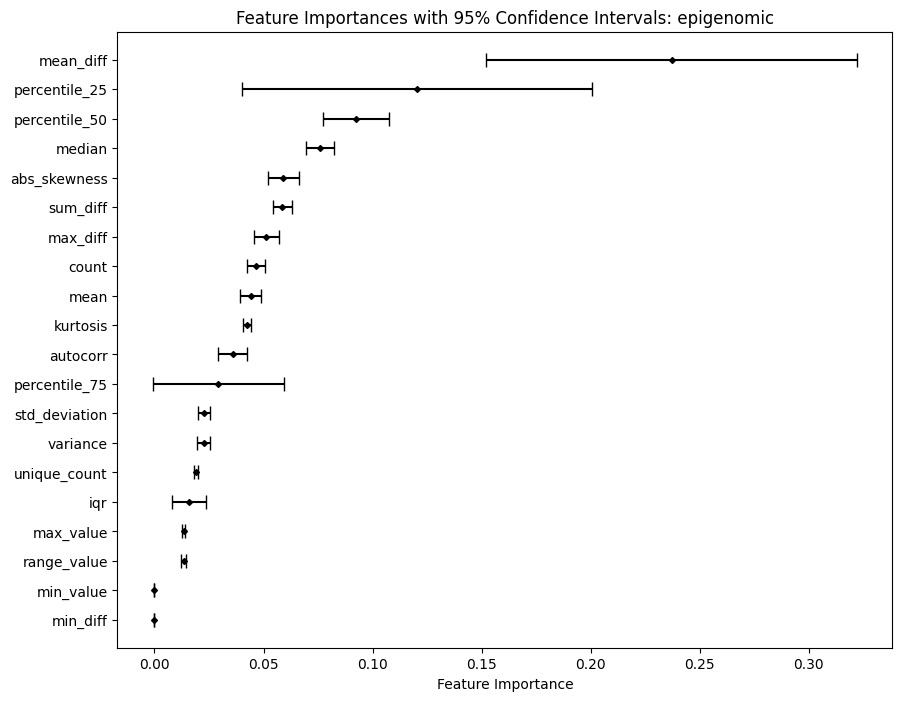

In [10]:
# Sort the indices based on mean_importances
sorted_indices = np.argsort(mean_importances)

# Sort the data accordingly
sorted_mean_importances = mean_importances[sorted_indices]
sorted_lower_bound = lower_bound[sorted_indices]
sorted_upper_bound = upper_bound[sorted_indices]
sorted_features = X.columns[sorted_indices]

plt.figure(figsize=(10, 8))
plt.errorbar(sorted_mean_importances, sorted_features, 
             xerr=[sorted_mean_importances - sorted_lower_bound, 
                   sorted_upper_bound - sorted_mean_importances], 
             fmt='D', color='black', ecolor='black', capsize=5, markersize=3)
plt.xlabel('Feature Importance')
plt.title('Feature Importances with 95% Confidence Intervals' + ": " + dataset)

plt.savefig("figs/random_forest_" + dataset + ".png")
plt.show()